## Observations and Insights 

In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how='outer' )

# Display the data table for preview
study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [69]:
# Checking the number of mice.
mice_count = study_data['Mouse ID'].nunique()
mice_count

249

In [70]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
study_data['Is_duplicate'] = study_data.duplicated()
study_data.loc[study_data['Is_duplicate']==True]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is_duplicate
909,g989,Propriva,Female,21,26,0,45.0,0,True


In [71]:
# Optional: Get all the data for the duplicate mouse ID. 
# Remove all data associated with the duplicate mouse ID


In [72]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data = study_data.loc[study_data['Is_duplicate']==False]
study_data = study_data.drop(['Is_duplicate'], axis=1)
study_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [73]:
# Checking the number of mice in the clean DataFrame.
mice_count = study_data['Mouse ID'].nunique()
mice_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
drugs_grouped = study_data.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume.
avg_tumor = drugs_grouped['Tumor Volume (mm3)'].mean()

med_tumor = drugs_grouped['Tumor Volume (mm3)'].median()

var_tumor = drugs_grouped['Tumor Volume (mm3)'].var()

std_tumor = drugs_grouped['Tumor Volume (mm3)'].std()

sem_tumor = drugs_grouped['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_summary = {'Mean (Tumor Vol.)': avg_tumor, 'Median (Tumor Vol.)': med_tumor,'Variance (Tumor Vol.)': var_tumor, 'Std Deviation (Tumor Vol.)': std_tumor, 'SEM': sem_tumor}

summary_df = pd.DataFrame(tumor_summary)
summary_df

,Mean (Tumor Vol.),Median (Tumor Vol.),Variance (Tumor Vol.),Std Deviation (Tumor Vol.),SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drugs_grouped['Tumor Volume (mm3)'].describe()


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,160.0,52.368318,6.502160,45.000000,47.107256,50.909965,56.259803,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

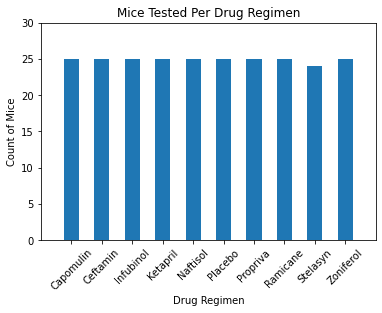

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Count of mice tested on each drug
mice_per_drug = drugs_grouped['Mouse ID'].nunique()

# Generate bar plot
mice_count_chart = mice_per_drug.plot(kind='bar')

plt.title('Mice Tested Per Drug Regimen')
plt.ylabel('Count of Mice')
plt.xlabel('Drug Regimen')
plt.ylim(0,30)
plt.xlim(-1, 10)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

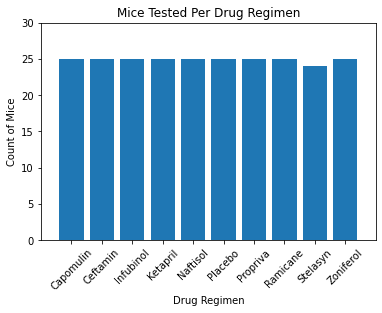

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# List of drugs
drugs = ['Capomulin', 'Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']

# Generate bar plot
mice_count_pltchart = plt.bar(drugs, mice_per_drug)

plt.title('Mice Tested Per Drug Regimen')
plt.ylabel('Count of Mice')
plt.xlabel('Drug Regimen')
plt.ylim(0,30)
plt.xlim(-1, 10)
plt.xticks(rotation=45)

Text(0, 0.5, '')

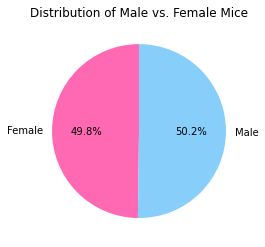

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group by gender
gender_grouped = study_data.groupby('Sex')

# Count every unique Mouse ID by gender
mice_gender = gender_grouped['Mouse ID'].nunique()

# Generate pie plot
colors = ['hotpink', 'lightskyblue']
mice_gender_chart = mice_gender.plot(kind='pie', colors=colors, autopct="%1.1f%%", startangle=90)

plt.title('Distribution of Male vs. Female Mice')
plt.ylabel('')

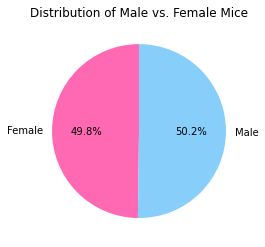

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_gender, colors=colors,
        autopct="%1.1f%%", startangle=90, labels=['Female','Male'])
plt.title('Distribution of Male vs. Female Mice')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tp_data = study_data.groupby('Mouse ID').max('Timepoint')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_data = pd.merge(study_data, final_tp_data, on=["Mouse ID", "Weight (g)", 'Age_months', 'Timepoint', "Metastatic Sites"], how="inner")

# Remove unneeded column
final_data = final_data.drop(["Tumor Volume (mm3)_y"], axis=1)

# Rename column
final_data = final_data.rename(columns = {'Tumor Volume (mm3)_x':'Tumor Volume (mm3)'})

# Sort values by treatment
final_data = final_data.sort_values(by='Drug Regimen')

# Filter for the four main treatment regimens
filtered_data = final_data[(final_data['Drug Regimen'] =='Capomulin') | (final_data['Drug Regimen'] == 'Ramicane') | (final_data['Drug Regimen'] =='Infubinol') | (final_data['Drug Regimen'] == 'Ceftamin')]

filtered_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,b742,Capomulin,Male,7,21,45,38.939633,0
45,i557,Capomulin,Female,1,24,45,47.685963,1
40,r944,Capomulin,Male,12,25,45,41.581521,2
39,l509,Capomulin,Male,17,21,45,41.483008,3
38,s710,Capomulin,Female,1,23,45,40.728578,1
...,...,...,...,...,...,...,...,...
29,c458,Ramicane,Female,23,20,30,38.342008,2
27,d251,Ramicane,Female,8,19,45,37.311236,2
17,a644,Ramicane,Female,7,17,45,32.978522,1
21,a520,Ramicane,Male,13,21,45,38.810366,1


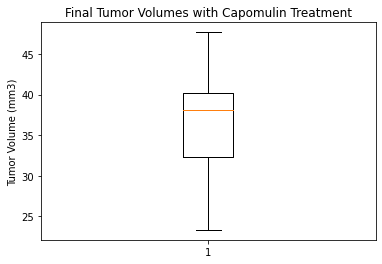

Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
Interquartile Range: 7.781863460000004
Median: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-----------------------------------


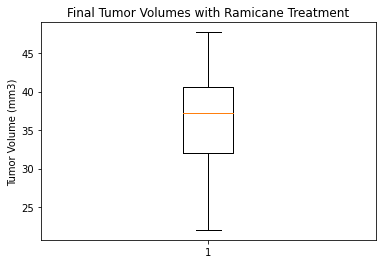

Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
Interquartile Range: 9.098536719999998
Median: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-----------------------------------


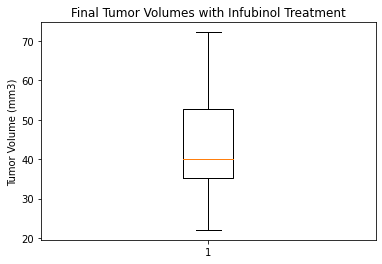

Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
Interquartile Range: 11.477135160000003
Median: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
-----------------------------------


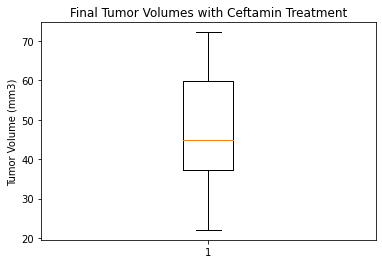

Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
Interquartile Range: 15.577752179999997
Median: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
-----------------------------------


In [14]:
# Put data into a list for for loop
rows = filtered_data.values.tolist()

# Bring back drug list created previously
four_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Locate the rows which contain mice on each drug and get the tumor volumes:

# first choose a drug to look up
for drug in four_drugs:
    # next choose a row 
    for row in rows:
        #if the second item in the row equals the drug we chose
        if row[1] == drug:
            # Then append the tumor vol (6th item starting from 0) in that row to the tumor vol list
            tumor_vol.append(row[6])
            
    # add subset        
    quartiles = filtered_data.loc[(filtered_data['Drug Regimen']==drug), 'Tumor Volume (mm3)'].quantile([.25,.5,.75])
    
    # Generate a box plot of the final tumor volume of each mouse across the four regimens of interest
    fig1, boxplot = plt.subplots()
    boxplot.set_title(f'Final Tumor Volumes with {drug} Treatment')
    boxplot.set_ylabel('Tumor Volume (mm3)')
    boxplot.boxplot(tumor_vol)
    plt.show()
    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"Interquartile Range: {iqr}")
    print(f"Median: {quartiles[0.5]}")
        
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print('-----------------------------------')
    

## Line and Scatter Plots

<ipython-input-62-b3977181e001>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cap_single_data = capomulin_data[(study_data['Mouse ID'] =='s710')]


Text(0, 0.5, 'Tumor Volume (mm3)')

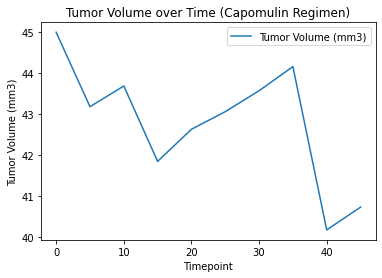

In [62]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = study_data[(study_data['Drug Regimen'] =='Capomulin')]

cap_single_data = capomulin_data[(study_data['Mouse ID'] =='s710')]

cap_single_data.plot(kind='line', x = 'Timepoint', y = 'Tumor Volume (mm3)')

plt.title('Tumor Volume over Time (Capomulin Regimen)')
plt.ylabel('Tumor Volume (mm3)')

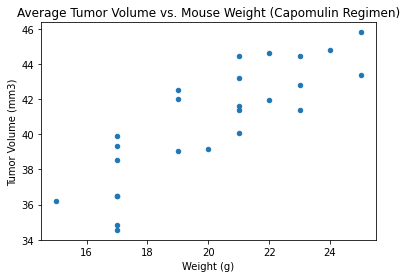

In [60]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
grouped_cap = capomulin_data.groupby('Mouse ID')

cap_avg_data = grouped_cap.agg({'Tumor Volume (mm3)':'mean', 'Weight (g)':'mean'})

# Plot
cap_avg_data.plot(kind='scatter', x = 'Weight (g)', y = 'Tumor Volume (mm3)')

plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)')
plt.show()


## Correlation and Regression

Text(6, 10, 'y = 0.96x + 21.49')

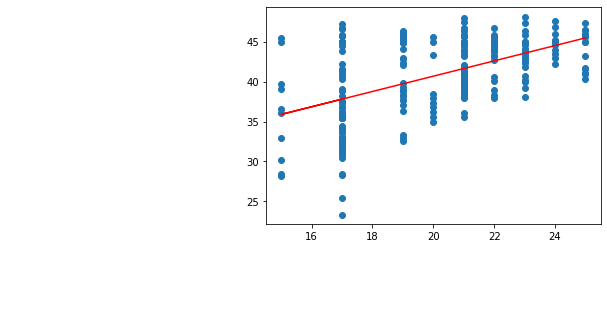

In [84]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_data
weight = capomulin_data.iloc[:, 4]
tumor = capomulin_data.iloc[:, 6]

cap_avg_data.corr()
slope, intercept, rvalues, pvalues, std_err = st.linregress(weight, tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tumor)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
